<a href="https://colab.research.google.com/github/junaid1729/Ezitech_internship/blob/main/Task06/customerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Name: Muhammad Junaid Iftikhar
# Roll Number: Ezi-ML-B1-161
# Shift Time: 3:00 PM - 6:00 PM
# Internship Type: hybird

# Task 6: Mall customer segmentation using K mean clustering (Elbow, Silhoutte and DBSCAN method)

**Importing Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

**Reading file**

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Checking necessary info from dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Checking for null values**

In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


/tmp/ipython-input-1154144886.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
/tmp/ipython-input-1154144886.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
/tmp/ipython-input-1154144886.py:7: UserWarning: 

`distplot` is a deprecated function and wil

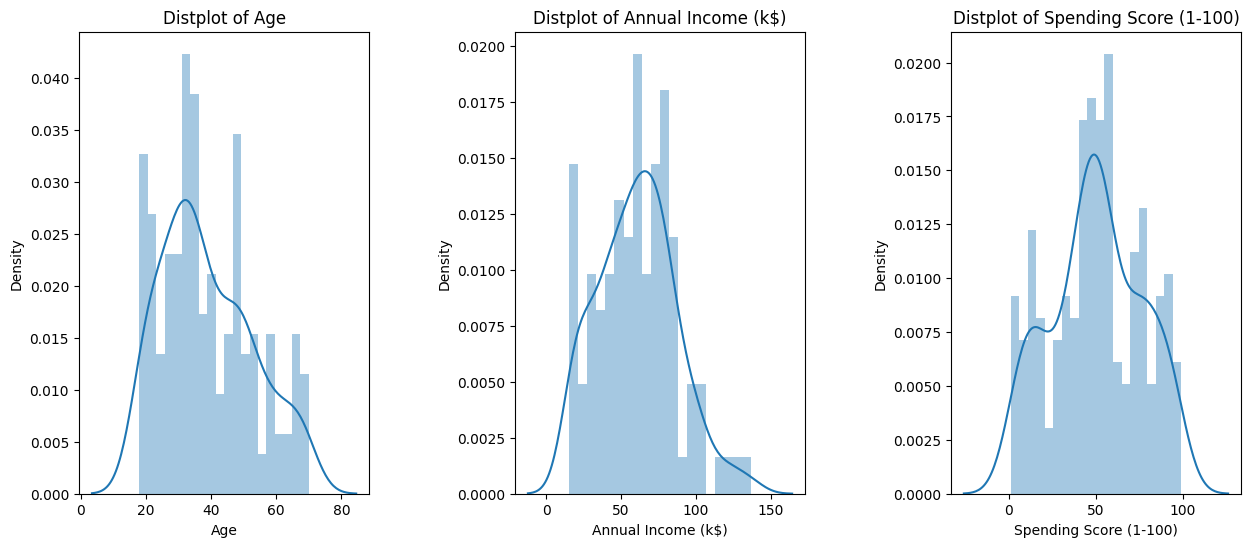

In [6]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

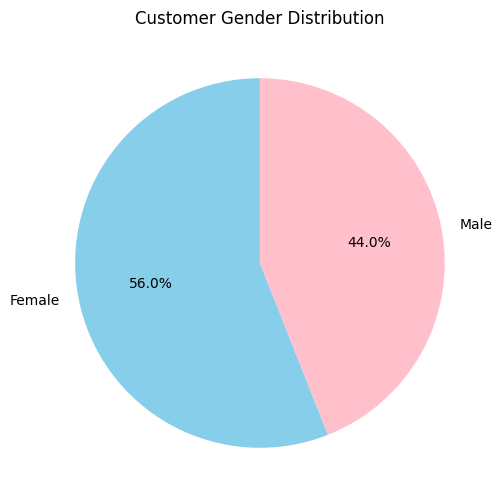

In [7]:
gender_counts = df["Gender"].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',   # show percentages
    startangle=90,       # start at top
    colors=['skyblue', 'pink']  # optional colors
)
plt.title("Customer Gender Distribution")
plt.show()

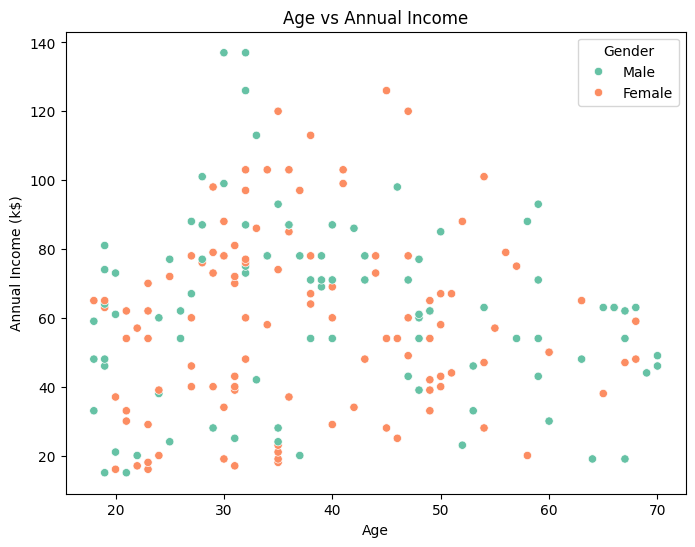

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Age", y="Annual Income (k$)", hue="Gender", palette="Set2")
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

/tmp/ipython-input-2784720001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Gender", y="Annual Income (k$)", palette="pastel")


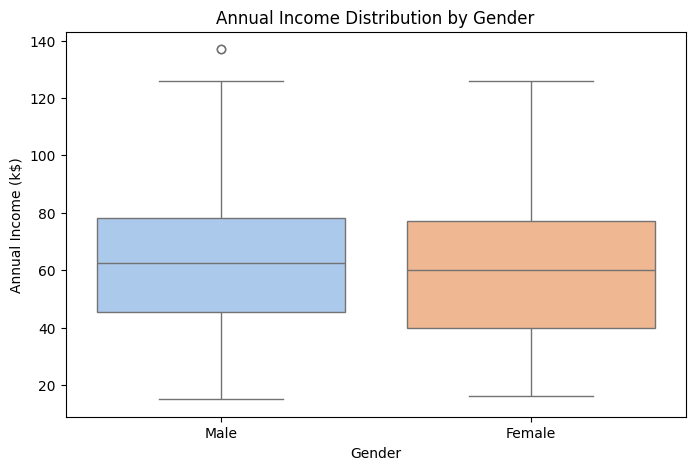

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Gender", y="Annual Income (k$)", palette="pastel")
plt.title("Annual Income Distribution by Gender")
plt.show()

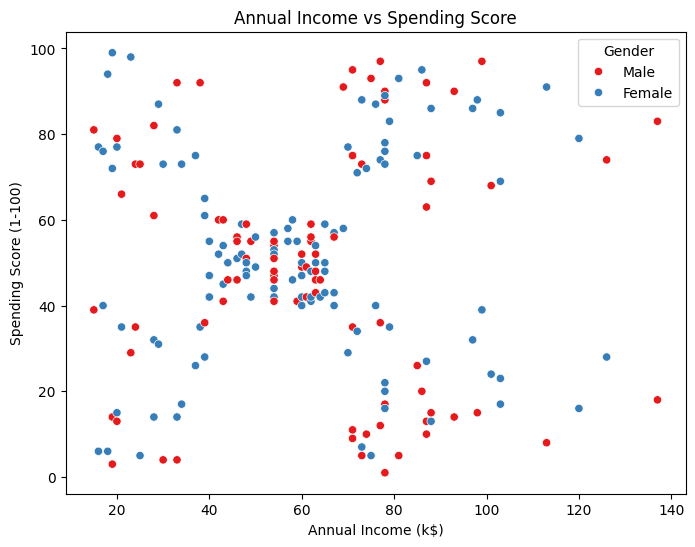

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", palette="Set1")
plt.title("Annual Income vs Spending Score")
plt.show()

In [11]:
X= df.iloc[:, [3,4]].values

In [13]:
wcss=[]


for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

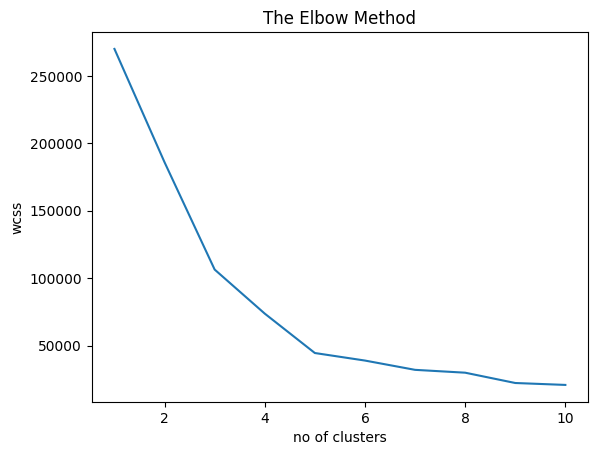

In [14]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [16]:
df['Kmeans_Cluster'] = y_kmeans

In [17]:
kmeans_score = silhouette_score(X, y_kmeans)
print(f"K-Means Silhouette Score: {kmeans_score:.3f}")

K-Means Silhouette Score: 0.554


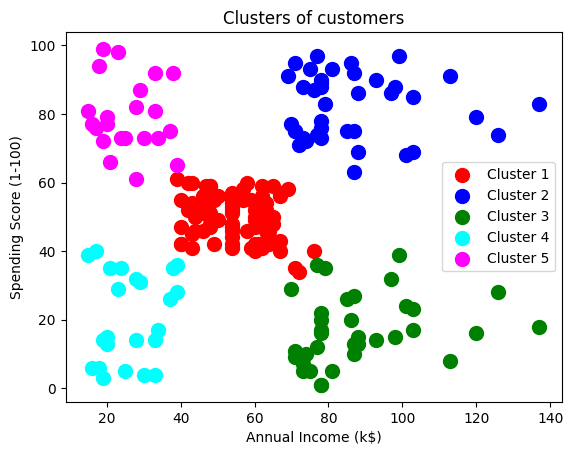

In [18]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [19]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Scale the data (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

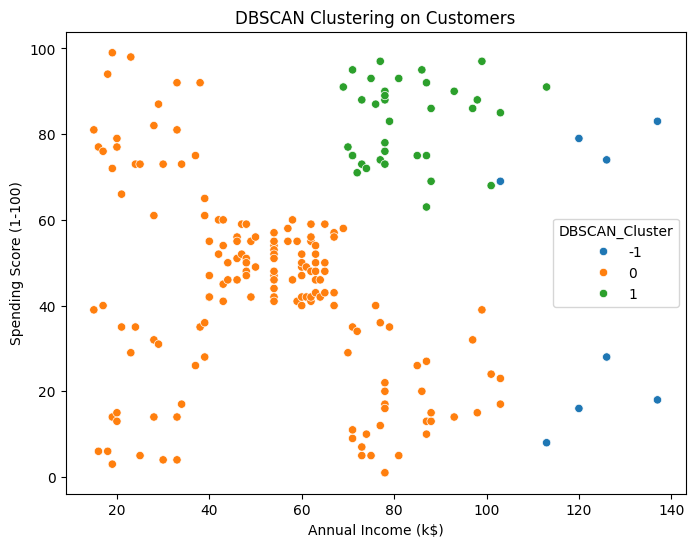

In [20]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)   # tune eps and min_samples
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to dataframe
df["DBSCAN_Cluster"] = clusters

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X["Annual Income (k$)"],
    y=X["Spending Score (1-100)"],
    hue=df["DBSCAN_Cluster"],
    palette="tab10"
)
plt.title("DBSCAN Clustering on Customers")
plt.show()

In [21]:
if len(set(clusters)) > 1 and -1 not in set(clusters):
    dbscan_score = silhouette_score(X_scaled, clusters)
    print(f"DBSCAN Silhouette Score: {dbscan_score:.3f}")
else:
    print("DBSCAN produced noise (-1 labels), Silhouette Score may not be meaningful.")

DBSCAN produced noise (-1 labels), Silhouette Score may not be meaningful.


In [22]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Kmeans_Cluster,DBSCAN_Cluster
0,1,Male,19,15,39,3,0
1,2,Male,21,15,81,4,0
2,3,Female,20,16,6,3,0
3,4,Female,23,16,77,4,0
4,5,Female,31,17,40,3,0


In [23]:
cluster_profiles = df.groupby("Kmeans_Cluster").agg({
    "Age": "mean",
    "Annual Income (k$)": "mean",
    "Spending Score (1-100)": "mean",
    "Gender": lambda x: x.value_counts(normalize=True).to_dict()  # gender distribution
})

# Add cluster size
cluster_profiles["Count"] = df.groupby("Kmeans_Cluster").size()

# Round values for readability
cluster_profiles = cluster_profiles.round(2)

cluster_profiles

,Age,Annual Income (k$),Spending Score (1-100),Gender,Count
Kmeans_Cluster,,,,,
0,42.72,55.30,49.52,"{'Female': 0.5925925925925926, 'Male': 0.40740...",81
1,32.69,86.54,82.13,"{'Female': 0.5384615384615384, 'Male': 0.46153...",39
2,41.11,88.20,17.11,"{'Male': 0.5428571428571428, 'Female': 0.45714...",35
3,45.22,26.30,20.91,"{'Female': 0.6086956521739131, 'Male': 0.39130...",23
4,25.27,25.73,79.36,"{'Female': 0.5909090909090909, 'Male': 0.40909...",22


/tmp/ipython-input-2886591944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


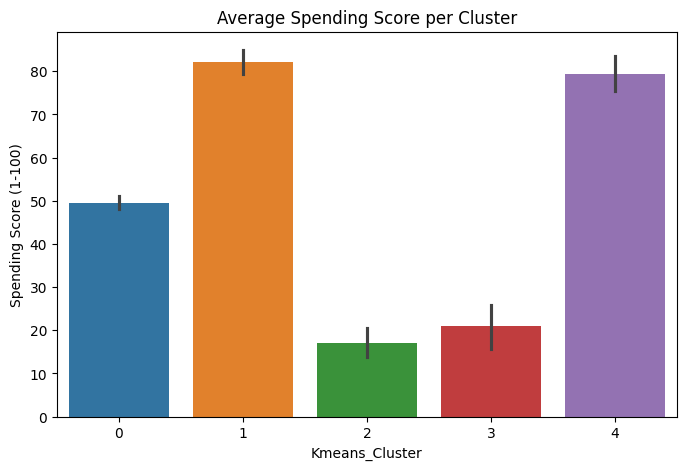

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x="Kmeans_Cluster",
    y="Spending Score (1-100)",
    estimator="mean",
    palette="tab10"
)
plt.title("Average Spending Score per Cluster")
plt.show()

***cluster 1 have most spending scores, this means the customers that belong to this cluster are easy to converse (target customers)***

In [27]:
cluster1 = df[df["Kmeans_Cluster"] == 1]
print("Cluster 1 Summary")
print(cluster1[["Age","Annual Income (k$)","Spending Score (1-100)"]].describe().round(2))

Cluster 1 Summary
         Age  Annual Income (k$)  Spending Score (1-100)
count  39.00               39.00                   39.00
mean   32.69               86.54                   82.13
std     3.73               16.31                    9.36
min    27.00               69.00                   63.00
25%    30.00               75.50                   74.50
50%    32.00               79.00                   83.00
75%    35.50               95.00                   90.00
max    40.00              137.00                   97.00



***This cluster consists mostly of young adults in their early 30s***

***This group is high-income compared to average population benchmarks.***

***These individuals are high spenders, indicating strong engagement with products/services.***

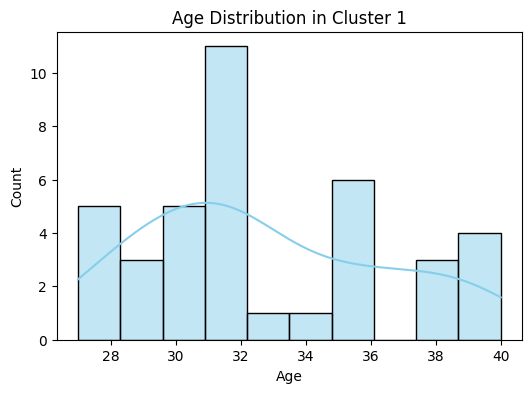

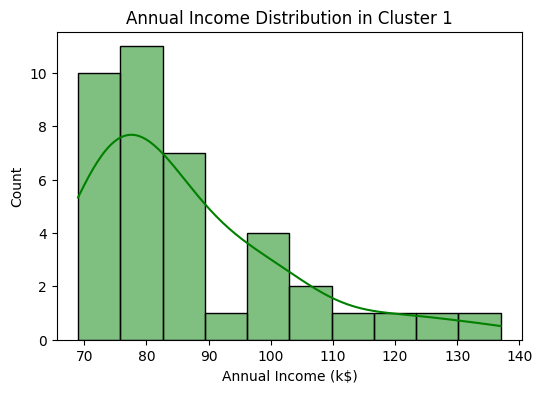

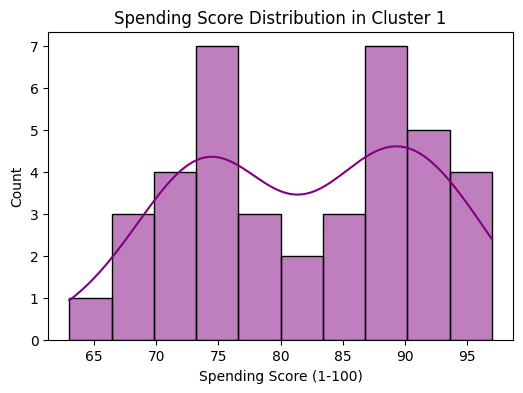

In [28]:
features = {
    "Age": ("Age Distribution in Cluster 1", "skyblue"),
    "Annual Income (k$)": ("Annual Income Distribution in Cluster 1", "green"),
    "Spending Score (1-100)": ("Spending Score Distribution in Cluster 1", "purple")
}

# Loop through features and plot
for column, (title, color) in features.items():
    plt.figure(figsize=(6,4))
    sns.histplot(cluster1[column], bins=10, kde=True, color=color)
    plt.title(title)
    plt.show()

***Cluster 1 represents a group of young, high-income, high-spending individuals. In marketing terms, they are often called “affluent spenders” or “premium target customers”. They may be ideal for luxury goods, high-end services, or lifestyle brands.***